In [ ]:
!pip install fasttext

import fasttext
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from google.colab import drive
import re
import seaborn as sns
drive.mount('/content/drive')
from bs4 import BeautifulSoup
import os
import re
!pip install emoji
import emoji

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


def load_dict_smileys():
  return {
        ":‑)":"gülücük",
        ":-]":"gülücük",
        ":-3":"gülücük",
        ":->":"gülücük",
        "8-)":"gülücük",
        ":-}":"gülücük",
        ":)":"gülücük",
        ":]":"gülücük",
        ":3":"gülücük",
        ":>":"gülücük",
        "8)":"gülücük",
        ":}":"gülücük",
        ":o)":"gülücük",
        ":c)":"gülücük",
        ":^)":"gülücük",
        "=]":"gülücük",
        "=)":"gülücük",
        ":-))":"gülücük",
        ":‑D":"gülücük",
        "8‑D":"gülücük",
        "x‑D":"gülücük",
        "X‑D":"gülücük",
        ":D":"gülücük",
        "8D":"gülücük",
        "xD":"gülücük",
        "XD":"gülücük",
        ":‑(":"üzgün",
        ":‑c":"üzgün",
        ":‑<":"üzgün",
        ":‑[":"üzgün",
        ":(":"üzgün",
        ":c":"üzgün",
        ":<":"üzgün",
        ":[":"üzgün",
        ":-||":"üzgün",
        ">:[":"üzgün",
        ":{":"üzgün",
        ":@":"üzgün",
        ">:(":"üzgün",
        ":'‑(":"üzgün",
        ":'(":"üzgün",
        ":‑P":"eğlenceli",
        "X‑P":"eğlenceli",
        "x‑p":"eğlenceli",
        ":‑p":"eğlenceli",
        ":‑Þ":"eğlenceli",
        ":‑þ":"eğlenceli",
        ":‑b":"eğlenceli",
        ":P":"eğlenceli",
        "XP":"eğlenceli",
        "xp":"eğlenceli",
        ":p":"eğlenceli",
        ":Þ":"eğlenceli",
        ":þ":"eğlenceli",
        ":b":"eğlenceli",
        "<3":"sevgi"
        }
def cumleyiarindir(tweet):
    tweet = BeautifulSoup(tweet).get_text()
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    #Lower case
    tweet = tweet.lower()
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    #Strip accents
   
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    return tweet

texts_=""
labels_ = []

folders=[ '1','2', '3']
filename='/content/drive/My Drive/data/3000tweet/raw_texts/'
for x in folders:
    tweet_count=0
    if(x=='1'):
      lbl = "__label__olumlu "
    if(x=='2'):
      lbl = "__label__olumsuz "
    if(x=='3'):
      lbl = "__label__notr "
    path=os.path.join(filename, x)        
    for t in os.listdir(path):
        tweet_count+=1   
        p2=os.path.join(path,t)          
        f=open(p2, "r", encoding="cp1254")   
        f=cumleyiarindir(f)
        txt=lbl+f+"\n"       
        texts_+=txt
        
        
    print(x,'. Klasör tweet sayısı :',tweet_count)
dosya=open('/content/drive/My Drive/data/3Ktweet.csv', 'w', encoding="utf8")
dosya.write(texts_)
dosya.close()


      # labels_.append(x)  

1 . Klasör tweet sayısı : 756
2 . Klasör tweet sayısı : 1287
3 . Klasör tweet sayısı : 957


In [ ]:
from sklearn.model_selection import train_test_split
txts=[]
lbls=[]
pred_test=[]
true_labels=[]
with open('/content/drive/My Drive/data/3Ktweet.csv', 'r', encoding="utf-8") as f:
  for line in f:
    y,x =line.split(' ', 1)
    txts.append(x)
    
    lbls.append(y)
x_train, x_test, y_train, y_test = train_test_split(txts, lbls, test_size = 0.2)
fp = open('/content/drive/My Drive/data/3Ktweet2.csv','w',encoding='utf8')
for i in range(len(x_train)):
  sntce=y_train[i]+ ' '+x_train[i]
  fp.write(sntce)
for i in range(len(x_test)):
  sntce=y_test[i]+ ' '+x_test[i]
  pred_test.append(x_test[i][:-1])
  true_labels.append(y_test[i])
  
  fp.write(sntce)
print(true_labels)
fp.close()

['__label__notr', '__label__olumsuz', '__label__notr', '__label__olumlu', '__label__olumlu', '__label__olumlu', '__label__olumsuz', '__label__olumsuz', '__label__olumlu', '__label__olumsuz', '__label__olumlu', '__label__olumsuz', '__label__olumlu', '__label__olumsuz', '__label__notr', '__label__olumlu', '__label__notr', '__label__olumlu', '__label__olumsuz', '__label__olumlu', '__label__notr', '__label__olumsuz', '__label__olumlu', '__label__notr', '__label__olumsuz', '__label__olumsuz', '__label__olumsuz', '__label__olumsuz', '__label__olumlu', '__label__notr', '__label__olumlu', '__label__olumsuz', '__label__notr', '__label__notr', '__label__olumsuz', '__label__olumlu', '__label__olumsuz', '__label__olumsuz', '__label__notr', '__label__notr', '__label__notr', '__label__olumsuz', '__label__olumsuz', '__label__olumlu', '__label__notr', '__label__olumsuz', '__label__olumsuz', '__label__olumsuz', '__label__olumlu', '__label__notr', '__label__olumsuz', '__label__olumsuz', '__label__olumsu

In [ ]:
def ayir(dosya, textsize):
  num_lines=sum(1 for line in open(dosya))
  count=0
  train=""
  test=""
  with open(dosya, 'r', encoding="utf-8") as f:
    for line in f:
      if(count<(num_lines/100)*(100-textsize)):
        train+=line
      else:
        test+=line
      count+=1
  dosya=open('/content/drive/My Drive/data/3KFasttrain.txt','w', encoding="utf8")
  dosya.write(train)
  dosya.close()
  dosya=open('/content/drive/My Drive/data/3KFasttest.txt','w', encoding="utf8")
  dosya.write(test)
  dosya.close()

ayir('/content/drive/My Drive/data/3Ktweet2.csv',20)


['__label__notr']
[[ 84  28  62]
 [ 38  82  39]
 [ 54  34 179]]
(<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f95d6c1c898>)
Accuracy :  0.575


(('__label__olumsuz', '__label__notr', '__label__olumlu'),
 array([0.6723417 , 0.02932223, 0.00083959]))

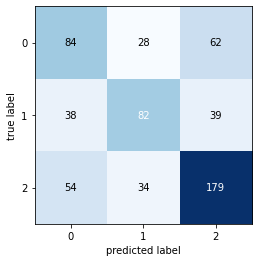

In [ ]:

model = fasttext.train_supervised(input='/content/drive/My Drive/data/3KFasttrain.txt', epoch=25, lr=.1, wordNgrams=1,loss='ova',dim=100)
model.test_label('/content/drive/My Drive/data/3KFasttest.txt')

def parse_labels(path):
    with open(path, 'r') as f:
        return np.array(list(map(lambda x: model.predict(x)[0][0], f.read().split())))

from mlxtend.plotting import plot_confusion_matrix
rounded_pred = model.predict(pred_test, k=1)
print(rounded_pred[0][1])

print(confusion_matrix(true_labels,rounded_pred[0]))
print(plot_confusion_matrix(conf_mat=confusion_matrix(true_labels,rounded_pred[0])))

total_acc=0
for i in range(len(rounded_pred[0])):
  
  if rounded_pred[0][i][0]==true_labels[i]:
    total_acc+=1
print("Accuracy : " ,total_acc/len(rounded_pred[0]))

model.predict("turkcell çok berbat",k=3)
